<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/2_2_Functional_API_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모델 설정

# 텍스트 크기 설정
from keras.models import Model
from keras import layers

text1_max_words = 1000   # text1의 단어 크기 : 1000단어 중 몇 개 선택
text2_max_words = 1000   # text2의 단어 크기 : 100단어 중 몇 개 선택
answer_max_words = 500   # answer의 단어 크기 : 500 단어 중 하나 선택

In [ ]:
# text1 Input 설정
text1_input = layers.Input(shape=(None,), dtype='int32', name='text1')  # text1의 input layer, shape=(None) : 어떤 길이든 입력받을 수 있음
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)     # text1의 embedding 층  //// 64 : output shape
encoded_text1 = layers.LSTM(32)(embedded_text1)  # text1의 LSTM         # text1의 순환신경망 층 //// LSTM(32) : output shape /// (100, 32)

# maxlen : 한 문장의 길이
# num_samples : 샘플의 개수

In [ ]:
# text2 Input 설정
text2_input = layers.Input(shape=(None,), dtype='int32', name='text2')
embedded_text2 = layers.Embedding(text2_max_words, 32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)    # (100, 16)

In [ ]:
# 데이터 병합
concatenated = layers.Concatenate(axis=-1)([encoded_text1, encoded_text2])   # axis = -1 : concatenation할 때, row의 개수만 같으면 됨

## concatenate 연습

In [ ]:
# concatenate 연습
import numpy as np
a = np.arange(10).reshape(2,5)   # 2행 5열 (2 rows, 5 columns)
print("a", a, "\n")

a [[0 1 2 3 4]
 [5 6 7 8 9]] 



In [ ]:
b = np.arange(20,30).reshape(2,5)
print("b", b, "\n")

b [[20 21 22 23 24]
 [25 26 27 28 29]] 



In [ ]:
import tensorflow as tf
print("axis=0", tf.keras.layers.Concatenate(axis=0)([a,b]), "\n")  # axis=0 : row로 연결 (단순히 내려쌓기) -> column의 개수가 같아야 함
print("axis=1", tf.keras.layers.Concatenate(axis=1)([a,b]), "\n")  # axis=1 : coulumn으로 연결 (row1은 row1끼리, row2는 row2끼리 병합) -> row의 개수가 같아야 함
print("axis=-1", tf.keras.layers.Concatenate(axis=-1)([a,b]))      # axis=-1 : 1로 했을 때와 동일한 결합

axis=0 tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int64) 

axis=1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64) 

axis=-1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int64)


In [ ]:
# 출력층 생성
answer = layers.Dense(answer_max_words, activation='softmax')(concatenated)   # 출력층의 노드는 500개 (-> 다중분류 - softmax) 중에 가장 확률이 큰 것 선택 출력층 생성
answer = layers.Dense(answer_max_words, activation='softmax')(concatenated)   # 출력층의 노드는 500개 (-> 다중분류 - softmax) 중에 가장 확률이 큰 것 선택

In [ ]:
# 모델 컴파일
model = Model(inputs=[text1_input, text2_input], outputs=answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text1 (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text2 (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 64)       │         64,000 │ text1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 32)       │         32,000 │ text2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 32)             │         12,416 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 16)             │          3,136 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 48)             │              0 │ lstm[0][0],            │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 500)            │         24,500 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 136,052 (531.45 KB)

 Trainable params: 136,052 (531.45 KB)

 Non-trainable params: 0 (0.00 B)

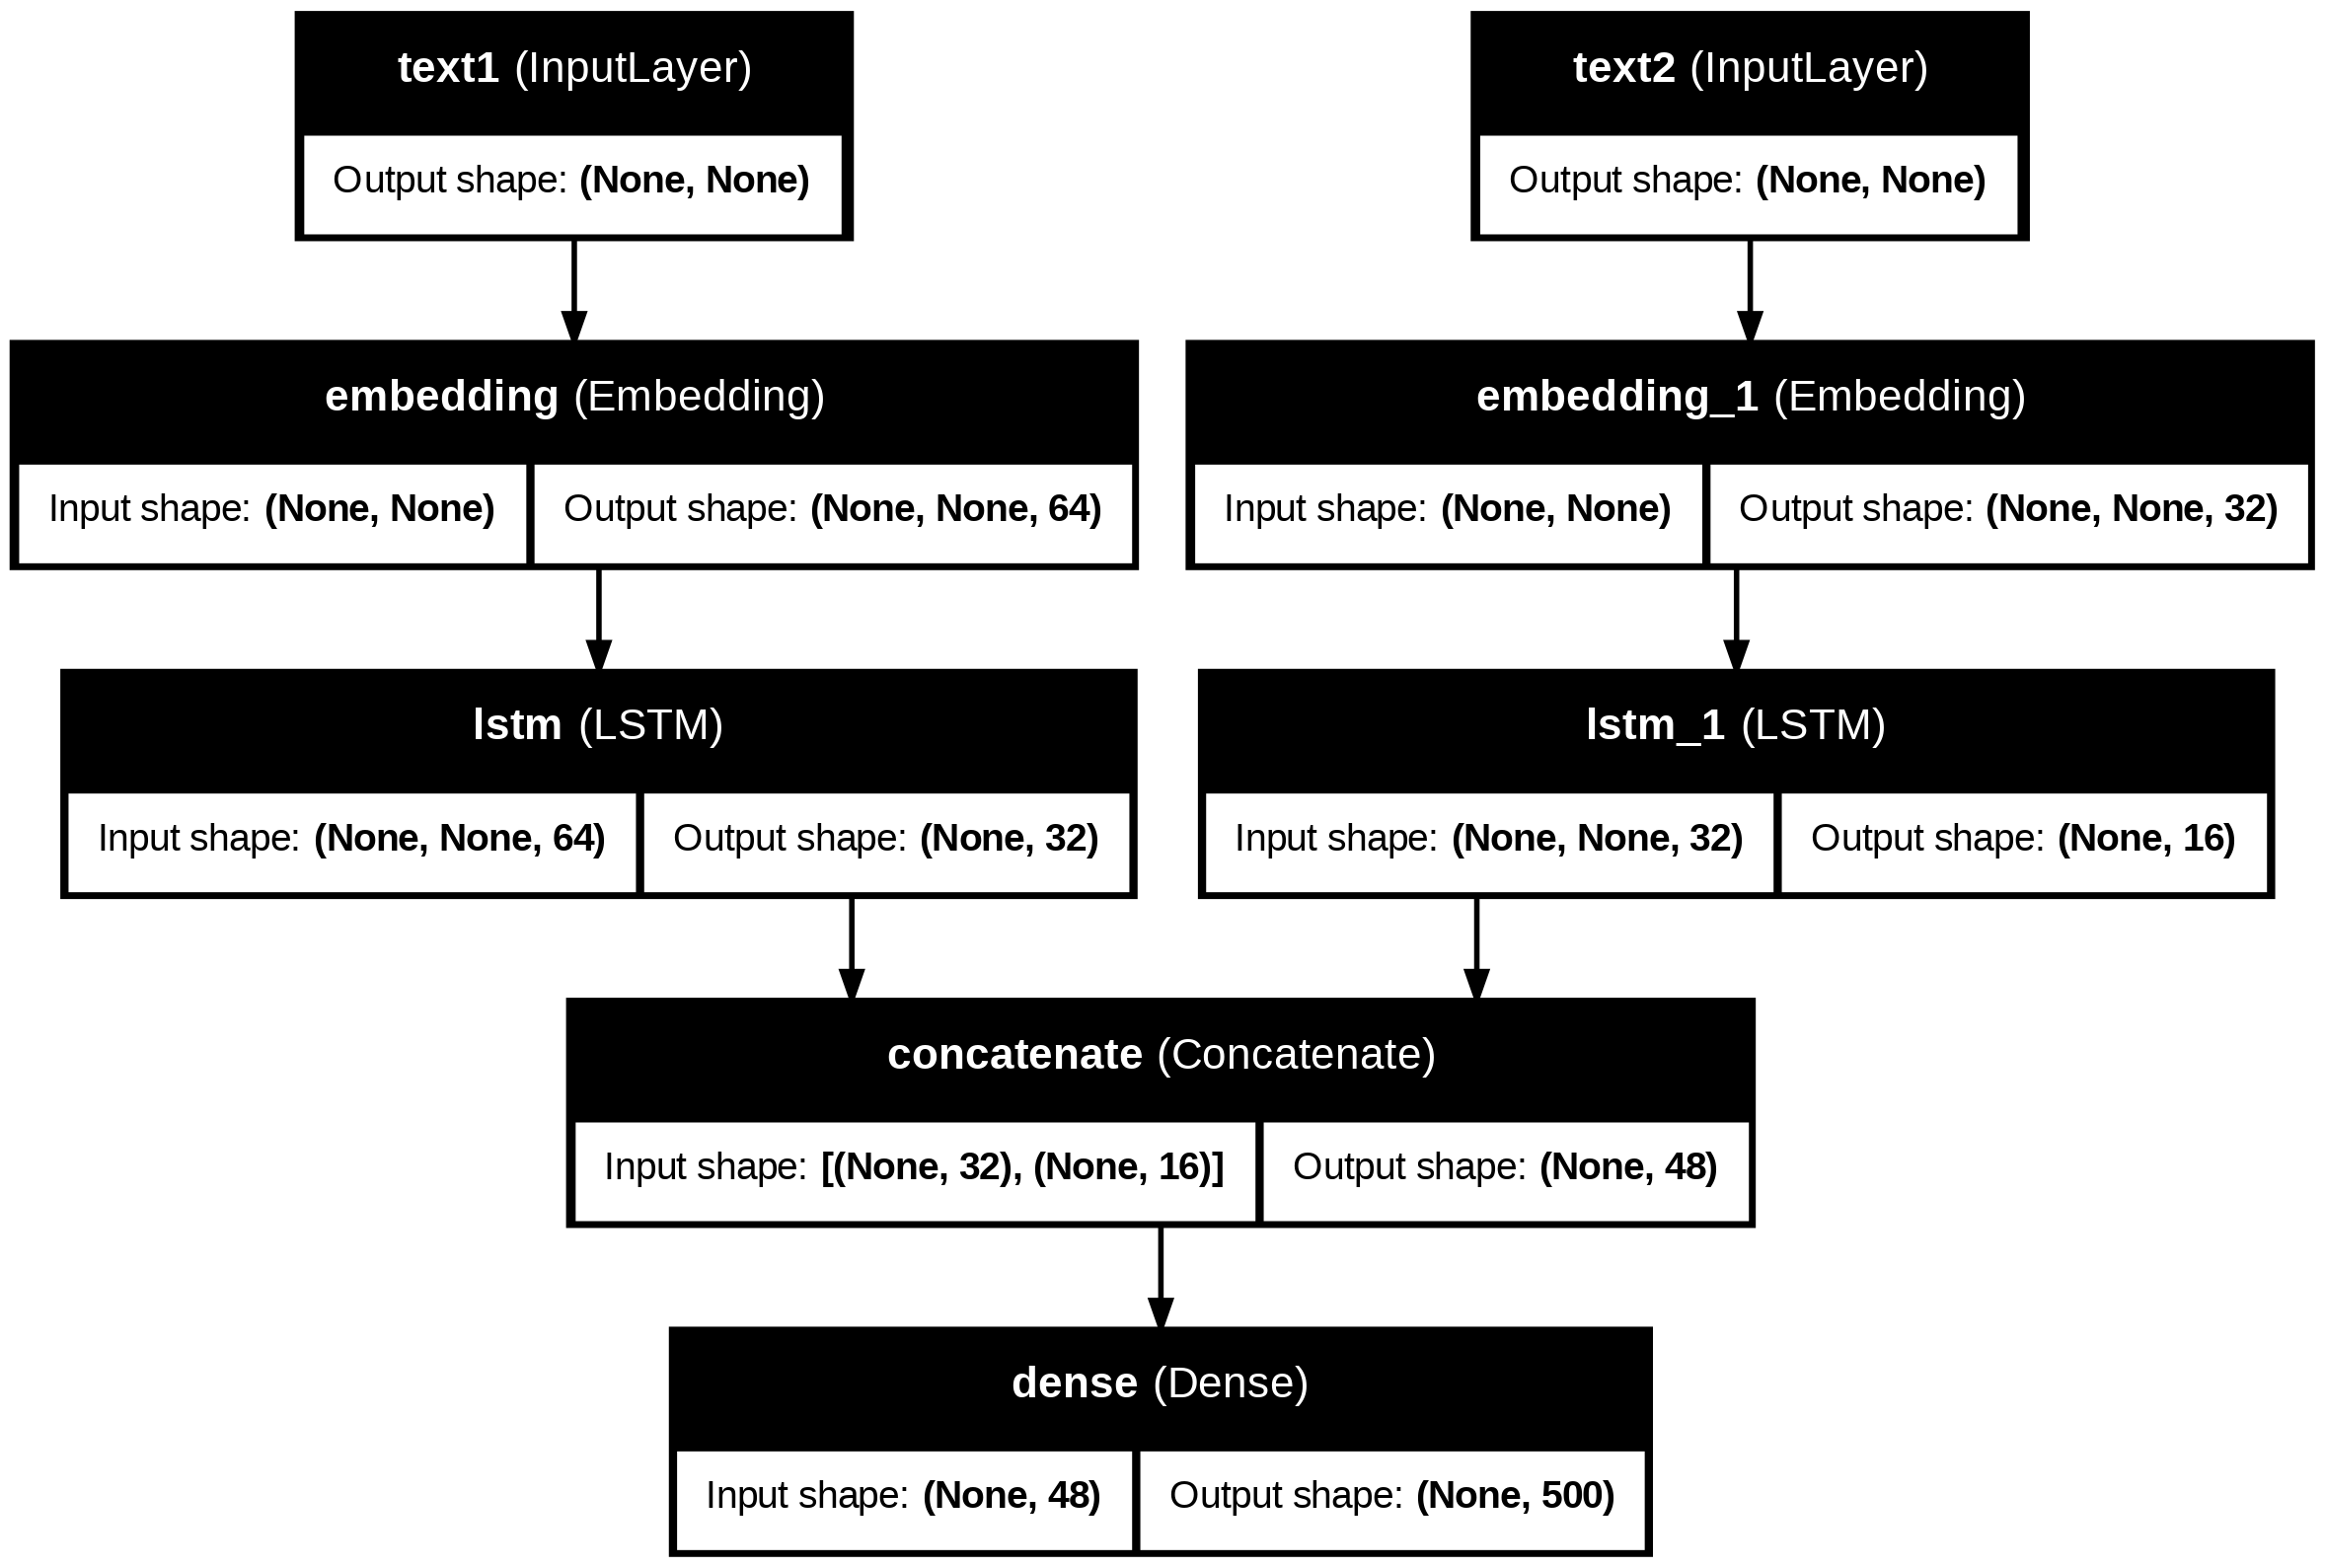

In [ ]:
# 모델 그래프
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 데이터 입력
import numpy as np
from keras.utils import to_categorical

num_samples = 1000 # 전체 샘플의 수
max_len = 100

In [ ]:
# 입력 데이터 생성
text1 = np.random.randint(low=0, high=text1_max_words, size=(num_samples, max_len))
text2 = np.random.randint(low=0, high=text2_max_words, size=(num_samples, max_len))

In [ ]:
text1

array([[497,  58, 431, ...,  26, 528, 165],
       [326, 329, 113, ..., 869, 841, 875],
       [212, 410, 985, ..., 164, 460, 557],
       ...,
       [344, 195, 163, ..., 137, 667, 557],
       [990, 512, 636, ..., 333, 804, 344],
       [728, 156, 341, ..., 594, 170, 956]])

In [ ]:
text2

array([[163, 609, 303, ..., 410, 948, 957],
       [722, 596, 528, ..., 816, 599, 539],
       [144, 815, 443, ..., 880, 102, 415],
       ...,
       [746, 525, 545, ..., 797,  32, 687],
       [620, 834,  83, ..., 212, 924, 416],
       [965, 530, 644, ..., 474, 913, 152]])

In [ ]:
text1.shape

(1000, 100)

In [ ]:
# 답변 데이터 생성
answers = np.random.randint(low=0, high=answer_max_words, size=num_samples)
answers = to_categorical(answers)

In [ ]:
answers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 모델 훈련
model.fit({'text1':text1, 'text2':text2}, answers, epochs=3, batch_size=128)

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.0070 - loss: 6.2143
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - acc: 0.0093 - loss: 6.2095
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - acc: 0.0039 - loss: 6.2056


In [ ]:
# 예측
prediction = model.predict({'text1':text1, 'text2':text2})
label = np.argmax(prediction[0])  # 가장 큰 확률을 가지고 있는 label(Node)
print(label)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
68


## 다중 출력 모델

In [ ]:
from keras import layers
from keras import Input
from keras.models import Model

max_words = 10000   # 사용되는 어휘는  10,000개
num_income_groups = 10  # 소득 수준 그룸은 총 10분위

In [ ]:
# Input 설정
posts_input = Input(shape=(None,), dtype='int32', name='posts')

In [ ]:
# 모델 셜계: 중간 과정 설정
x = layers.Embedding(max_words, 256)(posts_input)
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256,kernel_size= 5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
X = layers.GlobalMaxPooling1D()(x)
X = layers.Dense(128, activation='relu')(X)

In [ ]:
# 3개의 출력층 생성
pred_age = layers.Dense(1, name='age')(X)
pred_income = layers.Dense(num_income_groups, activation='softmax', name='income')(X)
pred_gender = layers.Dense(1, activation='sigmoid', name='gender')(X)

In [ ]:
# 모델 객체 생성
model = Model(posts_input, [pred_age, pred_income, pred_gender])

In [ ]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss={'age':'mse', 'income':'sparse_categorical_crossentropy', 'gender':'binary_crossentropy'}, metrics={'age':'mse', 'income':'acc', 'gender':'acc'})

In [ ]:
# 모델 구조
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ posts (InputLayer)        │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, None, 256)      │      2,560,000 │ posts[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, None, 128)      │        163,968 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, None, 128)      │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, None, 256)      │        164,096 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, None, 256)      │        327,936 │ conv1d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, None, 256)      │              0 │ conv1d_10[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, None, 256)      │        131,328 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_2    │ (None, 256)            │              0 │ conv1d_11[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         32,896 │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age (Dense)               │ (None, 1)              │            129 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ income (Dense)            │ (None, 10)             │          1,290 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (Dense)            │ (None, 1)              │            129 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,381,772 (12.90 MB)

 Trainable params: 3,381,772 (12.90 MB)

 Non-trainable params: 0 (0.00 B)

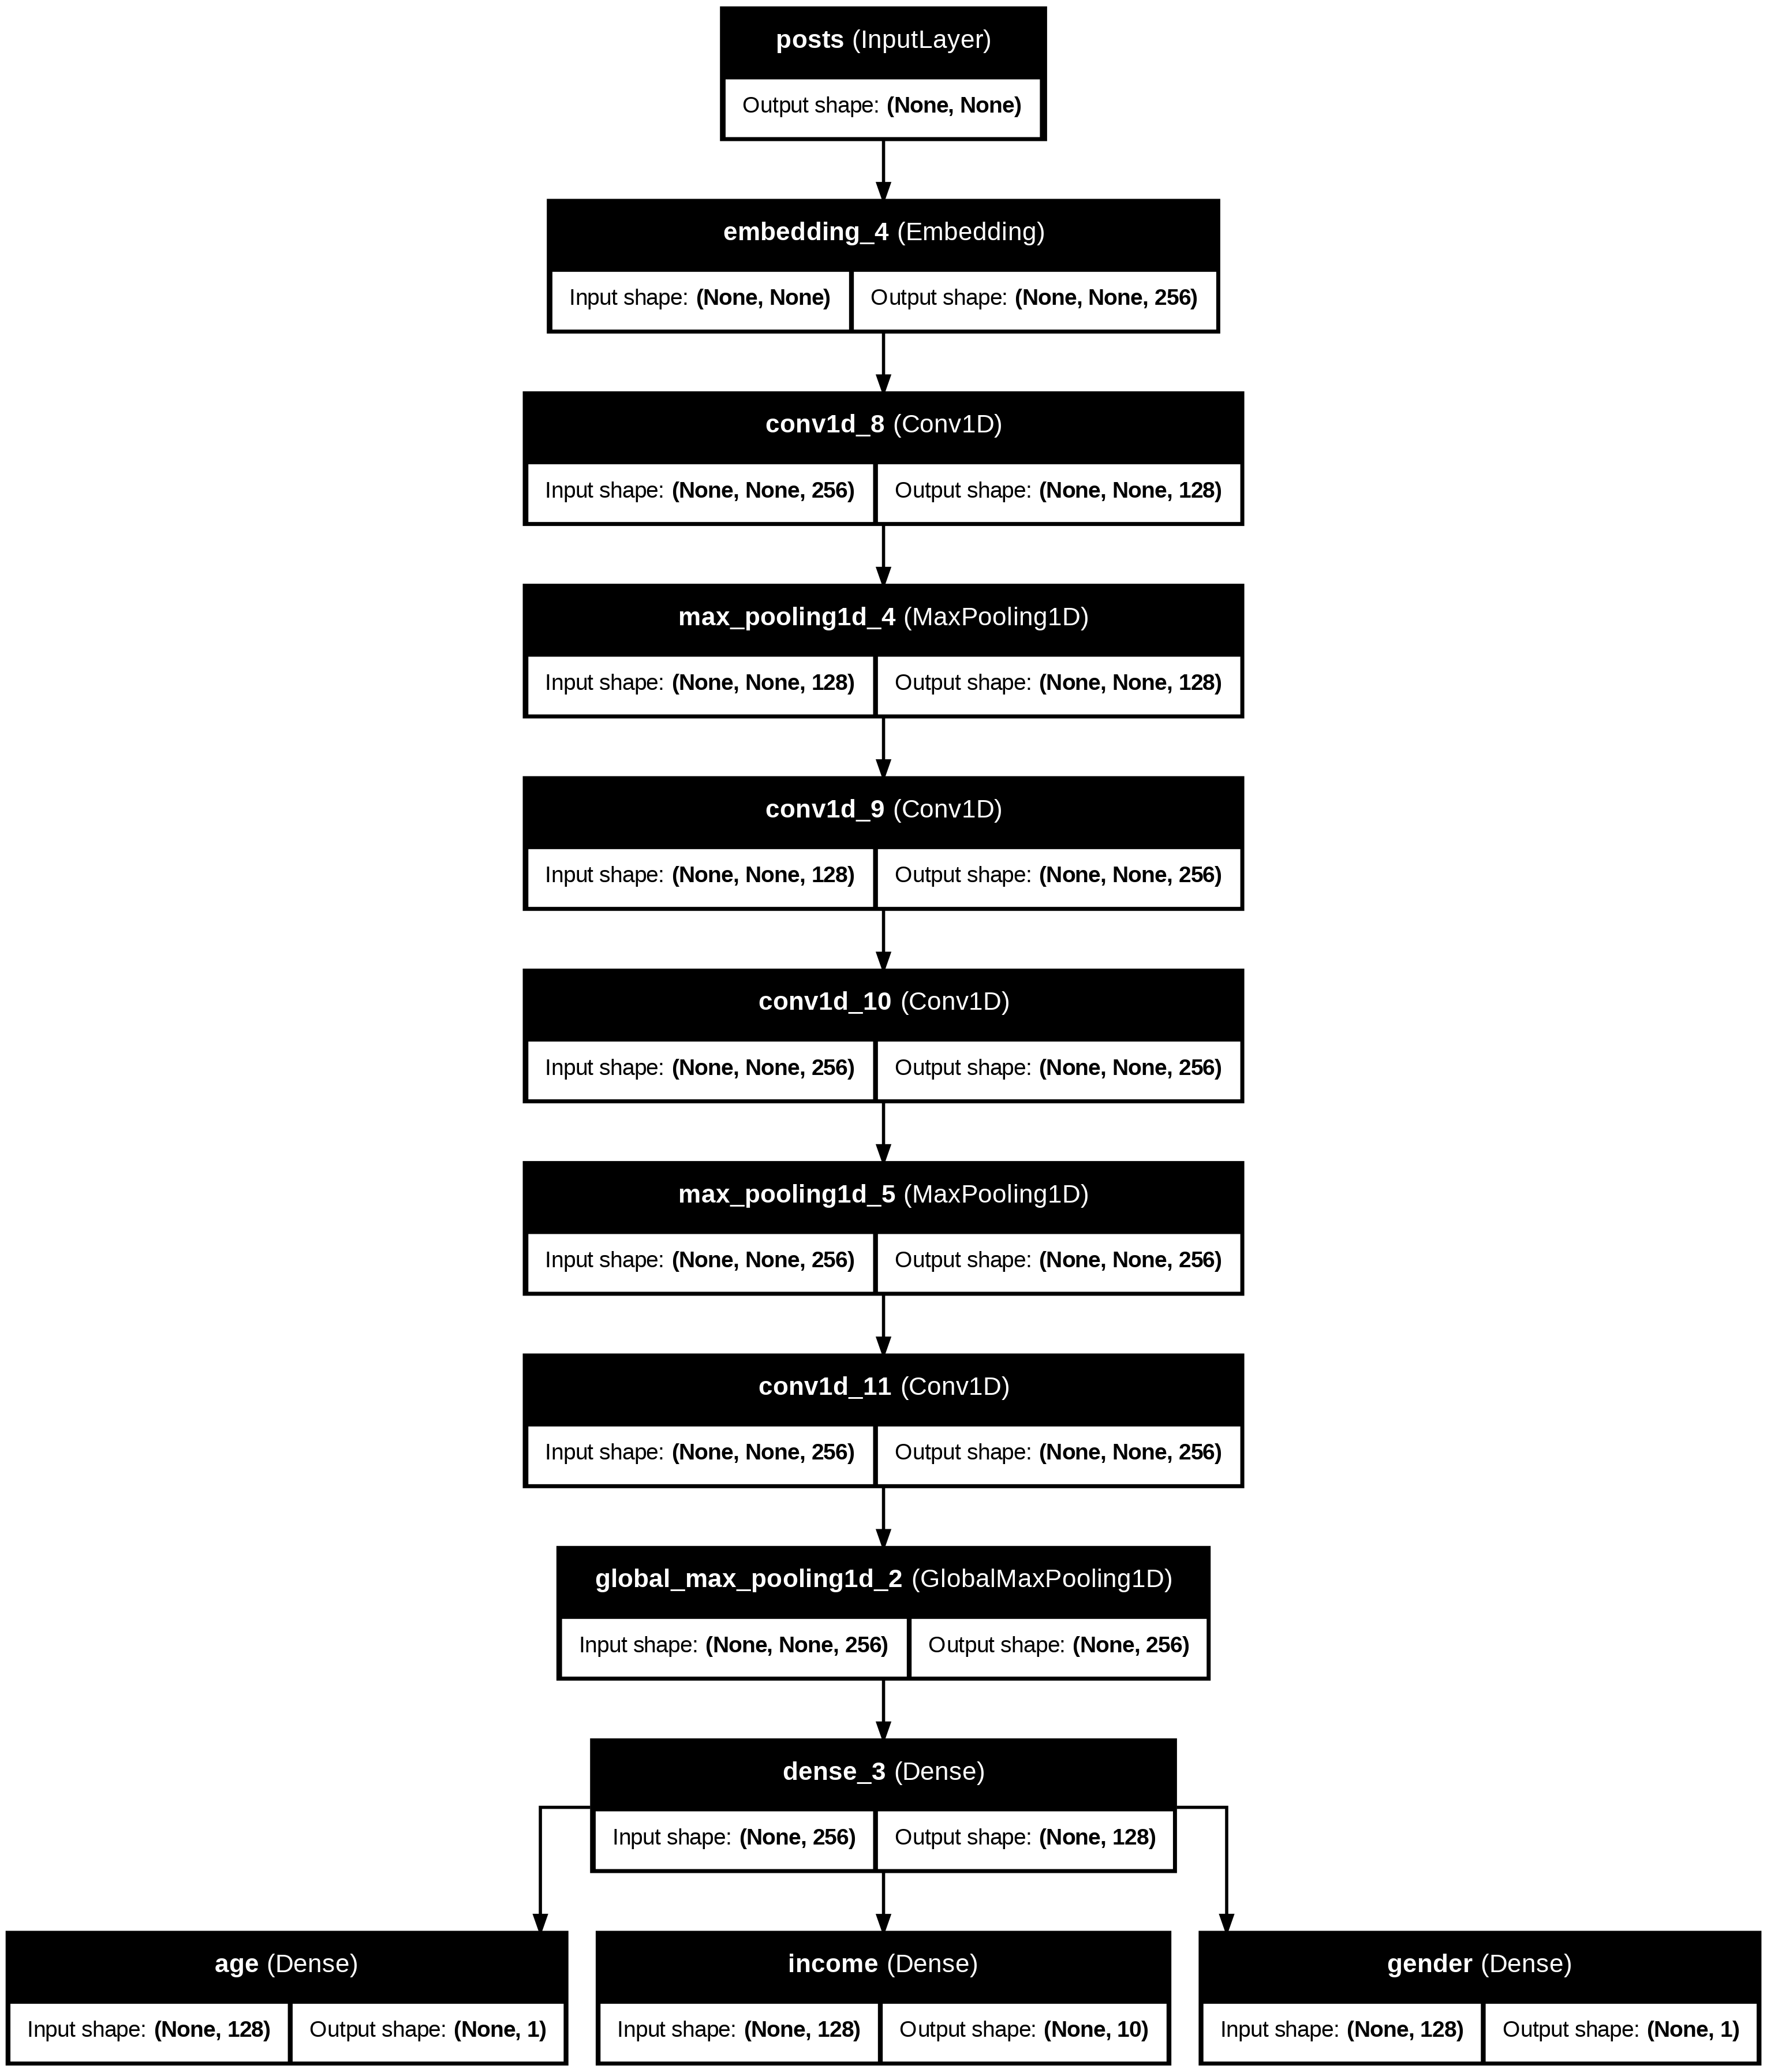

In [ ]:
# 모델 그래프
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 입력 데이터 생성
import numpy as np
num_samples = 1000
max_len = 100

# posts는 입려되는 소셜 블로그. (행의 수 * 문장 길이)의 2차원 데이터
posts = np.random.randint(low=0, high=max_words, size=(num_samples, max_len))

# 다음은 3개의 출력값
target_age = np.random.randint(low=0, high=100, size=num_samples)  # 연령은 0-99
target_income = np.random.randint(low=0, high=10, size=num_samples)  # 소득수준 그룹은 0-9
target_gender = np.random.randint(low=0, high=2, size=num_samples)  # 성별은 0(여성) 또는 1(남성)

In [ ]:
# 모델 훈련
history = model.fit(posts, {'age':target_age, 'income':target_income, 'gender':target_gender}, epochs=3, batch_size=64)

history.history

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - age_mse: 2111.0339 - gender_acc: 0.4823 - income_acc: 0.1030 - loss: 2116.5623
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - age_mse: 691.4659 - gender_acc: 0.5090 - income_acc: 0.1055 - loss: 694.5774
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - age_mse: 337.5508 - gender_acc: 0.4917 - income_acc: 0.0989 - loss: 340.6196


{'age_mse': [1454.73095703125, 679.5951538085938, 350.882568359375],
 'gender_acc': [0.48500001430511475, 0.5070000290870667, 0.4970000088214874],
 'income_acc': [0.08900000154972076, 0.0949999988079071, 0.09799999743700027],
 'loss': [1460.0360107421875, 682.6884155273438, 353.971435546875]}

In [ ]:
# 평가

# 모델에 예측할 데이터와 그 정답을 같이 넣어준다
test_eval = model.evaluate(posts, {'age':target_age, 'income':target_income, 'gender':target_gender})

# 모델이 예측한 결과와 입려된 정답을 비교한 결과
print('prediction model loss:', test_eval)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - age_mse: 441.2166 - gender_acc: 0.4596 - income_acc: 0.0875 - loss: 444.3943
prediction model loss: [445.2879943847656, 442.1145324707031, 0.46700000762939453, 0.09099999815225601]


In [ ]:
# 예측
result = model.predict(posts)

print(result[0][:10])
print(result[1][:5])
print(result[2][:10])

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
[[43.069412]
 [35.121967]
 [11.372103]
 [56.920208]
 [28.49487 ]
 [58.035767]
 [15.913825]
 [26.017292]
 [50.747368]
 [58.221733]]
[[0.08372781 0.08224931 0.19300279 0.18204293 0.11482251 0.04167992
  0.02835137 0.10121176 0.06406655 0.10884512]
 [0.08819149 0.08832293 0.17326358 0.16573678 0.11448541 0.04663279
  0.03830242 0.10450257 0.07327357 0.10728852]
 [0.09754875 0.09946686 0.1222465  0.11879686 0.10504781 0.08346585
  0.07366915 0.10372078 0.08891551 0.10712186]
 [0.07534228 0.07263539 0.22892705 0.20765693 0.1157834  0.02890962
  0.01812831 0.09621272 0.05238733 0.10401691]
 [0.0933779  0.09071281 0.16034444 0.14945029 0.11018812 0.06691588
  0.04163128 0.10005518 0.06835512 0.11896903]]
[[0.6479711 ]
 [0.6239552 ]
 [0.54035705]
 [0.6917444 ]
 [0.59900886]
 [0.69508326]
 [0.5539959 ]
 [0.59045607]
 [0.6746673 ]
 [0.69715154]]


## 연습문제

In [ ]:
#문제 설명: output은 2개 -> '다중출력"

In [ ]:
# 데이터 로딩
import tensorflow as tf
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

# shape의 결과가 3D이기 때문에 4D로 바꾸는 작업을 해야 함

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# 홀짝 배열 생성 - train
# train: 홀수(1)와 짝수(0) 배열 만들기
y_train_odd = []
for y in train_labels:
  if y % 2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
print("y_train_odd.shape:", y_train_odd.shape)

y_train_odd.shape: (60000,)


In [ ]:
# 홀짝 배열 생성 - test
# test: 홀수(1)와 짝수(0) 배열 만들기
y_test_odd = []
for y in test_labels:
  if y % 2 == 0:
    y_test_odd.append(0)
  else:
    y_test_odd.append(1)

y_test_odd = np.array(y_test_odd)
print("y_test_odd.shape:", y_test_odd.shape)

y_test_odd.shape: (10000,)


In [ ]:
# 전처리 결과
# 값 비교
print("원 데이터:", train_labels[:10])
print("홀짝 데이터:", y_train_odd[:10])

원 데이터: [5 0 4 1 9 2 1 3 1 4]
홀짝 데이터: [1 0 0 1 1 0 1 1 1 0]


In [ ]:
# 데이터 정규화
x_train = train_images / 255.0
x_test = test_images / 255.0

In [ ]:
# 채널 추가
x_train_4d = tf.expand_dims(x_train, axis=-1)  # 새로운 축을 마지막에 추가
x_test_4d = tf.expand_dims(x_test,-1)

print(x_train_4d.shape, x_test_4d.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from os import name
# 모델 설계
from keras.models import Model
from keras import layers
from keras import Input

inputs = Input(shape=(28,28,1), dtype='float32', name='inputs')

conv = layers.Conv2D(32, kernel_size=(3,3), activation='relu', name='conv2d')(inputs)
pool = layers.MaxPooling2D(pool_size=2, name='maxpooling2d')(conv)
flat = layers.Flatten(name='flatten')(pool)

digit_outputs = layers.Dense(10, activation='softmax', name='digit_dense')(flat)
odd_outputs = layers.Dense(1, activation='sigmoid', name='odd_dense')(flat)

model = Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)       │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 26, 26, 32)     │            320 │ inputs[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ maxpooling2d              │ (None, 13, 13, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 5408)           │              0 │ maxpooling2d[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ digit_dense (Dense)       │ (None, 10)             │         54,090 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ odd_dense (Dense)         │ (None, 1)              │          5,409 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 59,819 (233.67 KB)

 Trainable params: 59,819 (233.67 KB)

 Non-trainable params: 0 (0.00 B)

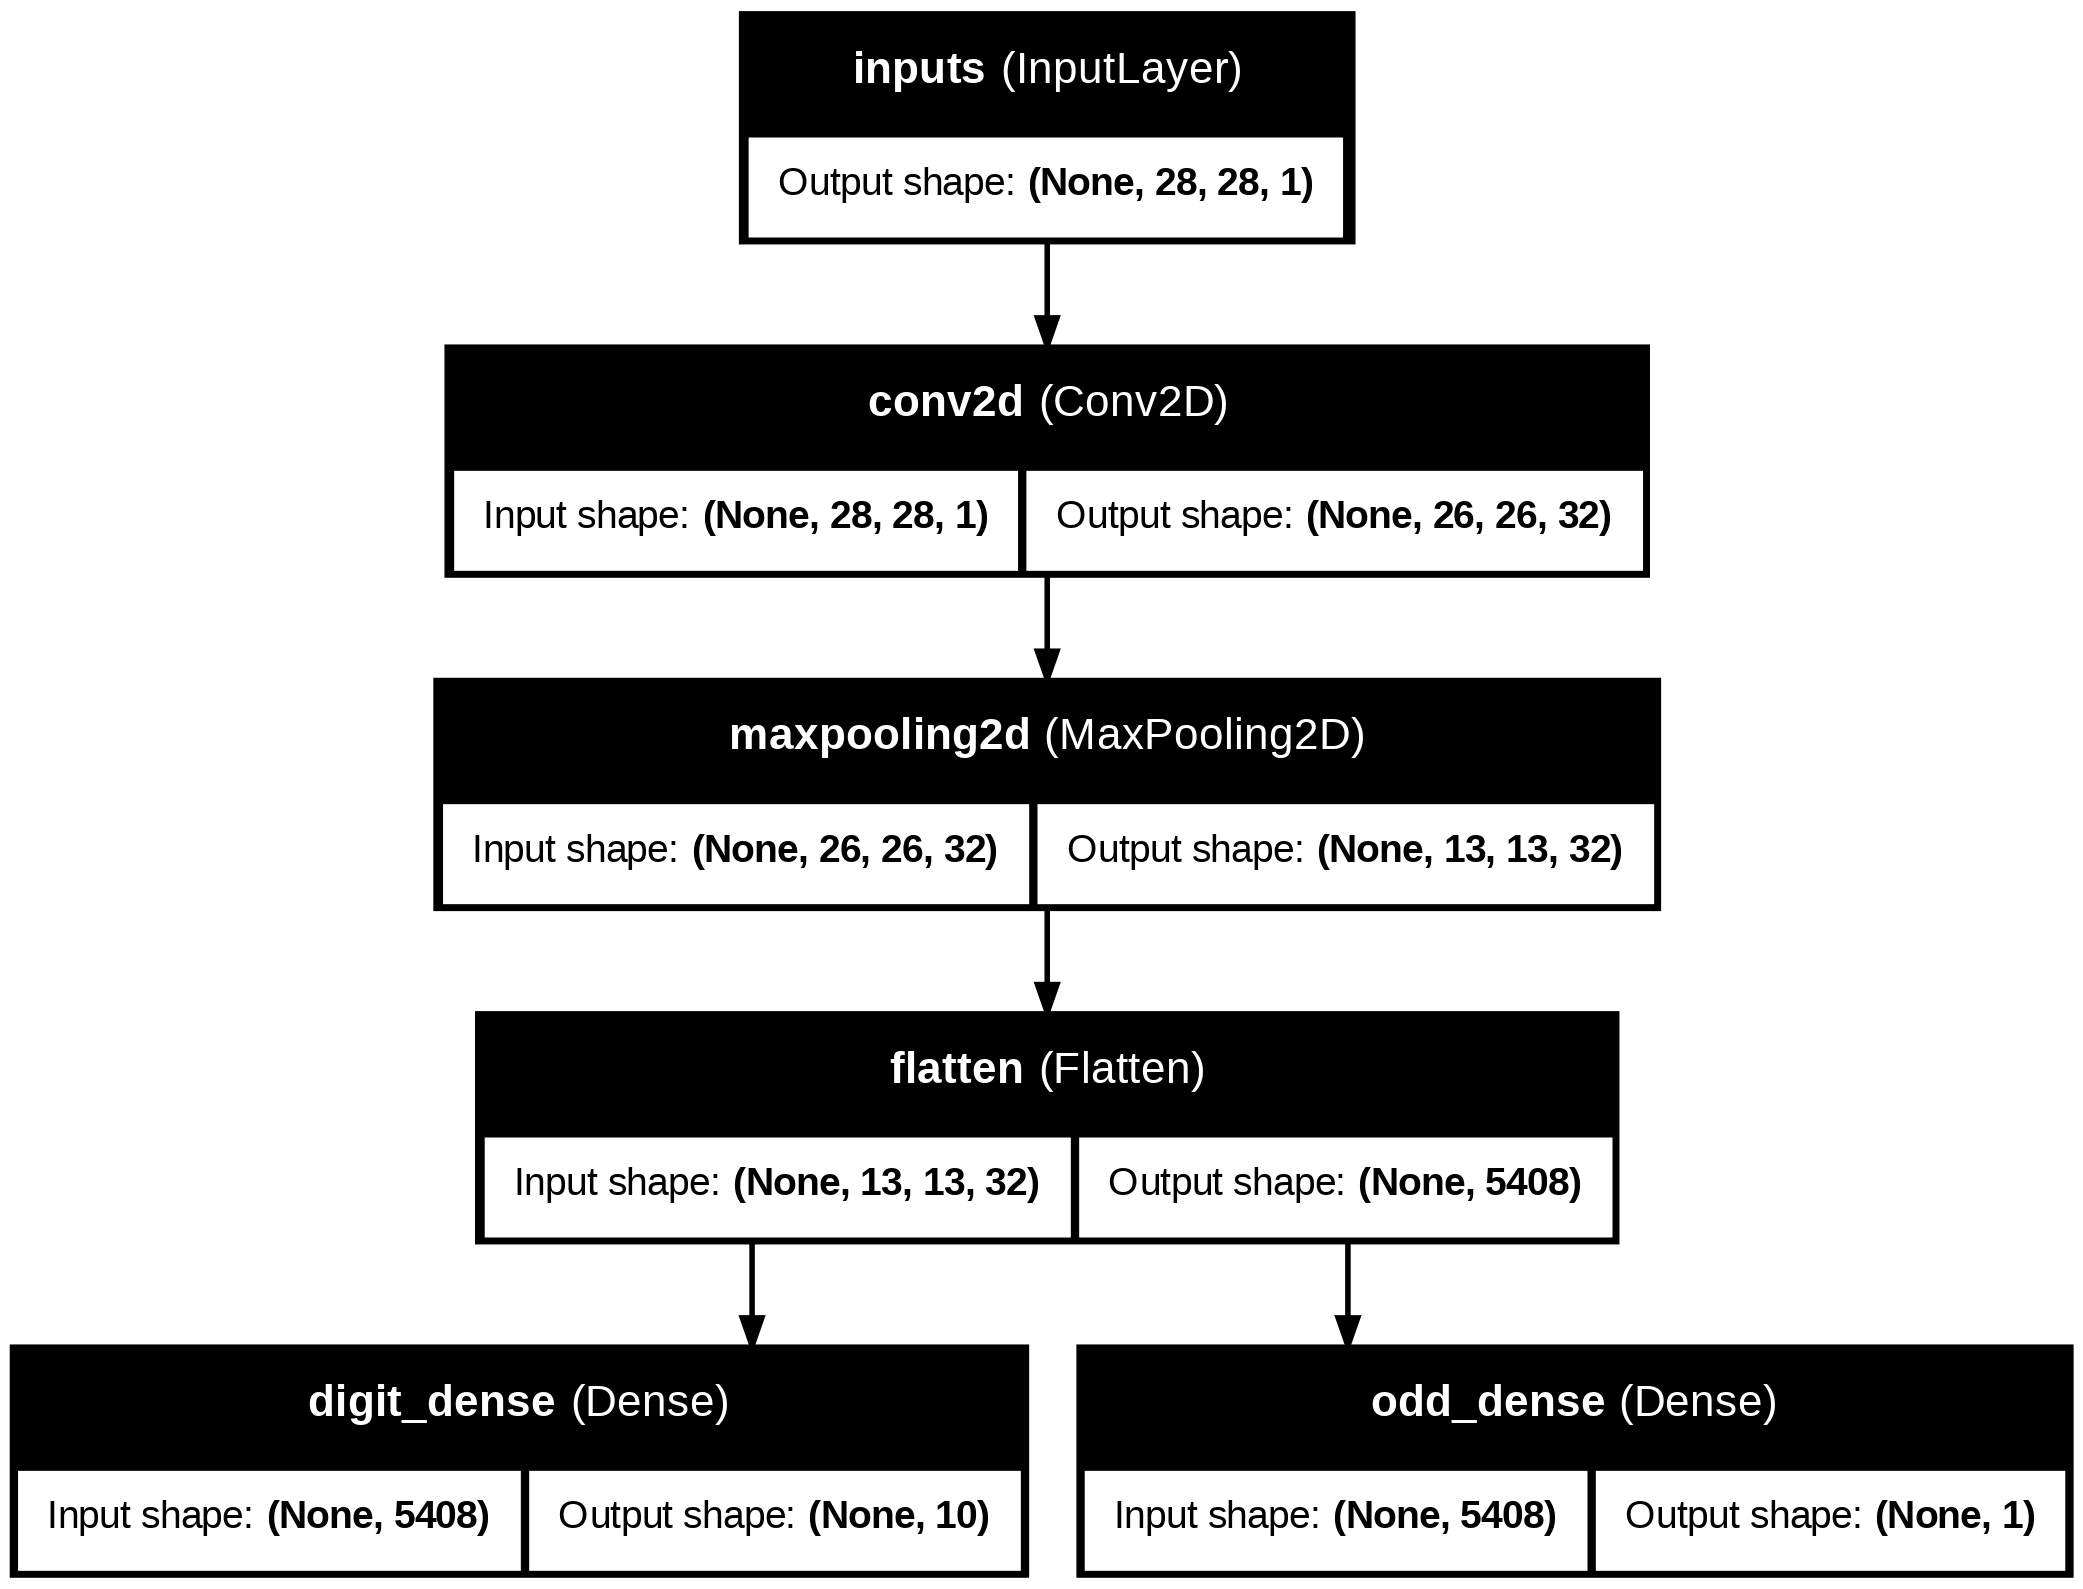

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [ ]:
# 모델 컴파일 및 훈련
# 정수를 바로 종속변수로 사용하면, 손실함수는 sparse_categorical_crossentropy
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'}, metrics={'digit_dense':'acc','odd_dense':'acc'})

# 모델 훈련
history = model.fit(x_train_4d, [train_labels,y_train_odd], validation_data=(x_test_4d, [test_labels, y_test_odd]), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - digit_dense_acc: 0.8633 - loss: 0.7960 - odd_dense_acc: 0.8765 - val_digit_dense_acc: 0.9650 - val_loss: 0.2428 - val_odd_dense_acc: 0.9573
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - digit_dense_acc: 0.9697 - loss: 0.2165 - odd_dense_acc: 0.9614 - val_digit_dense_acc: 0.9775 - val_loss: 0.1666 - val_odd_dense_acc: 0.9699
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - digit_dense_acc: 0.9767 - loss: 0.1683 - odd_dense_acc: 0.9677 - val_digit_dense_acc: 0.9756 - val_loss: 0.1560 - val_odd_dense_acc: 0.9719
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - digit_dense_acc: 0.9832 - loss: 0.1440 - odd_dense_acc: 0.9705 - val_digit_dense_acc: 0.9792 - val_loss: 0.1458 - val_odd_dense_acc: 0.9710
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - digit_dense_acc: 0.9838 - loss: 0.1328 - odd_dense_acc: 0.9723 - val_digit_dense_acc: 0.9791 - val_loss: 0.1335 - val_odd_dense_acc: 0.9753
Epoch 6/10
938/938 ━

In [ ]:
# 성능 평가
result = model.evaluate(x_test_4d, [test_labels, y_test_odd])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - digit_dense_acc: 0.9805 - loss: 0.1380 - odd_dense_acc: 0.9754


In [ ]:
# 성능 확인
print("validation loss:", result[0])
print("val_digit_dense_acc:", result[1])
print("val_odd_dense_acc", result[2])

print(history.history.keys())
print("digit_dense_acc:", history.history['digit_dense_acc'])
print('loss:', history.history['loss'])
print("odd_dense_acc:", history.history['odd_dense_acc'])
print('val_digit_dense_acc:', history.history['val_digit_dense_acc'])
print('val_loss:', history.history['val_loss'])
print("val_odd_dense_acc:", history.history['val_odd_dense_acc'])

validation loss: 0.11679475009441376
val_digit_dense_acc: 0.984000027179718
val_odd_dense_acc 0.9789000153541565
dict_keys(['digit_dense_acc', 'loss', 'odd_dense_acc', 'val_digit_dense_acc', 'val_loss', 'val_odd_dense_acc'])
digit_dense_acc: [0.9253166913986206, 0.9715499877929688, 0.9782500267028809, 0.9824000000953674, 0.9841166734695435, 0.9862499833106995, 0.9878833293914795, 0.9886500239372253, 0.9904000163078308, 0.9913166761398315]
loss: [0.473314106464386, 0.20835494995117188, 0.16428792476654053, 0.143399178981781, 0.1312040537595749, 0.11917443573474884, 0.11081630736589432, 0.10416866838932037, 0.09666101634502411, 0.09024868160486221]
odd_dense_acc: [0.92208331823349, 0.9628499746322632, 0.9685166478157043, 0.9712166786193848, 0.9725666642189026, 0.9748833179473877, 0.9760833382606506, 0.9773333072662354, 0.9778333306312561, 0.9792166948318481]
val_digit_dense_acc: [0.9649999737739563, 0.9775000214576721, 0.975600004196167, 0.979200005531311, 0.9790999889373779, 0.980300009

In [ ]:
# 1개 데이터 예측
print("x_test_4d[0]의 Dimension:", x_test_4d[0].ndim)
print("x_test_4d[0:1]의 Dimension:", x_test_4d[0:1].ndim)

result = model.predict(x_test_4d[0:1])
print("예상 숫자:", np.argmax(result[0]))
print("홀수 1, 짝수 0:", (result[1][0][0] > 0.5).astype(np.int64))

print("\n정답:", test_labels[0])

x_test_4d[0]의 Dimension: 3
x_test_4d[0:1]의 Dimension: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
예상 숫자: 7
홀수 1, 짝수 0: 1

정답: 7


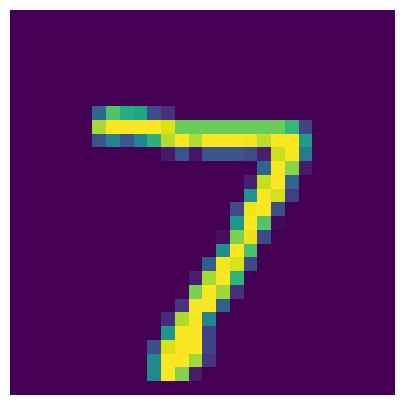

In [ ]:
# 숫자 확인
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.imshow(x_test_4d[0])
plt.axis('off')
plt.show()